# Importing the relevant libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OrdinalEncoder

# Data Preprocessing

### Importing the Database

In [3]:
raw_data = pd.read_csv('ml_datasource.csv')
raw_data.head()

,student_country,days_on_platform,minutes_watched,courses_started,practice_exams_started,practice_exams_passed,minutes_spent_on_exams,purchased
0,US,288,358.1,1,2,2,15.81,0
1,SG,260,1.7,1,1,0,16.00,0
2,TR,260,22.4,1,1,0,0.93,0
3,KE,259,18.8,1,1,1,14.63,0
4,IN,259,118.0,2,2,1,16.48,0


In [4]:
data = raw_data.copy()

### Removing Outliers

#### Boolean Indexing
#### Metrics to outliers:
##### Minutes watched larger than 1,000
##### Number of courses surpassing 10
##### Number of practice exams started higher than 10
##### Minutes spent on exams going beyond 40 minutes

In [5]:
def clean_outliers(data):
    mask_watched = data['minutes_watched']<=1000
    mask_courses = data['courses_started']<=10
    mask_exams = data['practice_exams_started']<=10
    mask_min_exams = data['minutes_spent_on_exams']<=40

    data = data[mask_watched & mask_courses & mask_exams & mask_min_exams]

    return data

data_no_outliers = clean_outliers(data)

In [6]:
data_no_outliers.describe(include = 'all')

,student_country,days_on_platform,minutes_watched,courses_started,practice_exams_started,practice_exams_passed,minutes_spent_on_exams,purchased
count,17618,17626.000000,17626.000000,17626.000000,17626.000000,17626.000000,17626.000000,17626.000000
unique,171,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,123.454102,27.145342,1.177295,0.183195,0.119029,0.778405,0.092137
std,NaN,90.773394,56.290650,0.559075,0.817034,0.588701,3.476651,0.289227
min,NaN,0.000000,0.100000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,41.000000,1.100000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,113.000000,6.700000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,204.000000,33.400000,1.000000,0.000000,0.000000,0.000000,0.000000


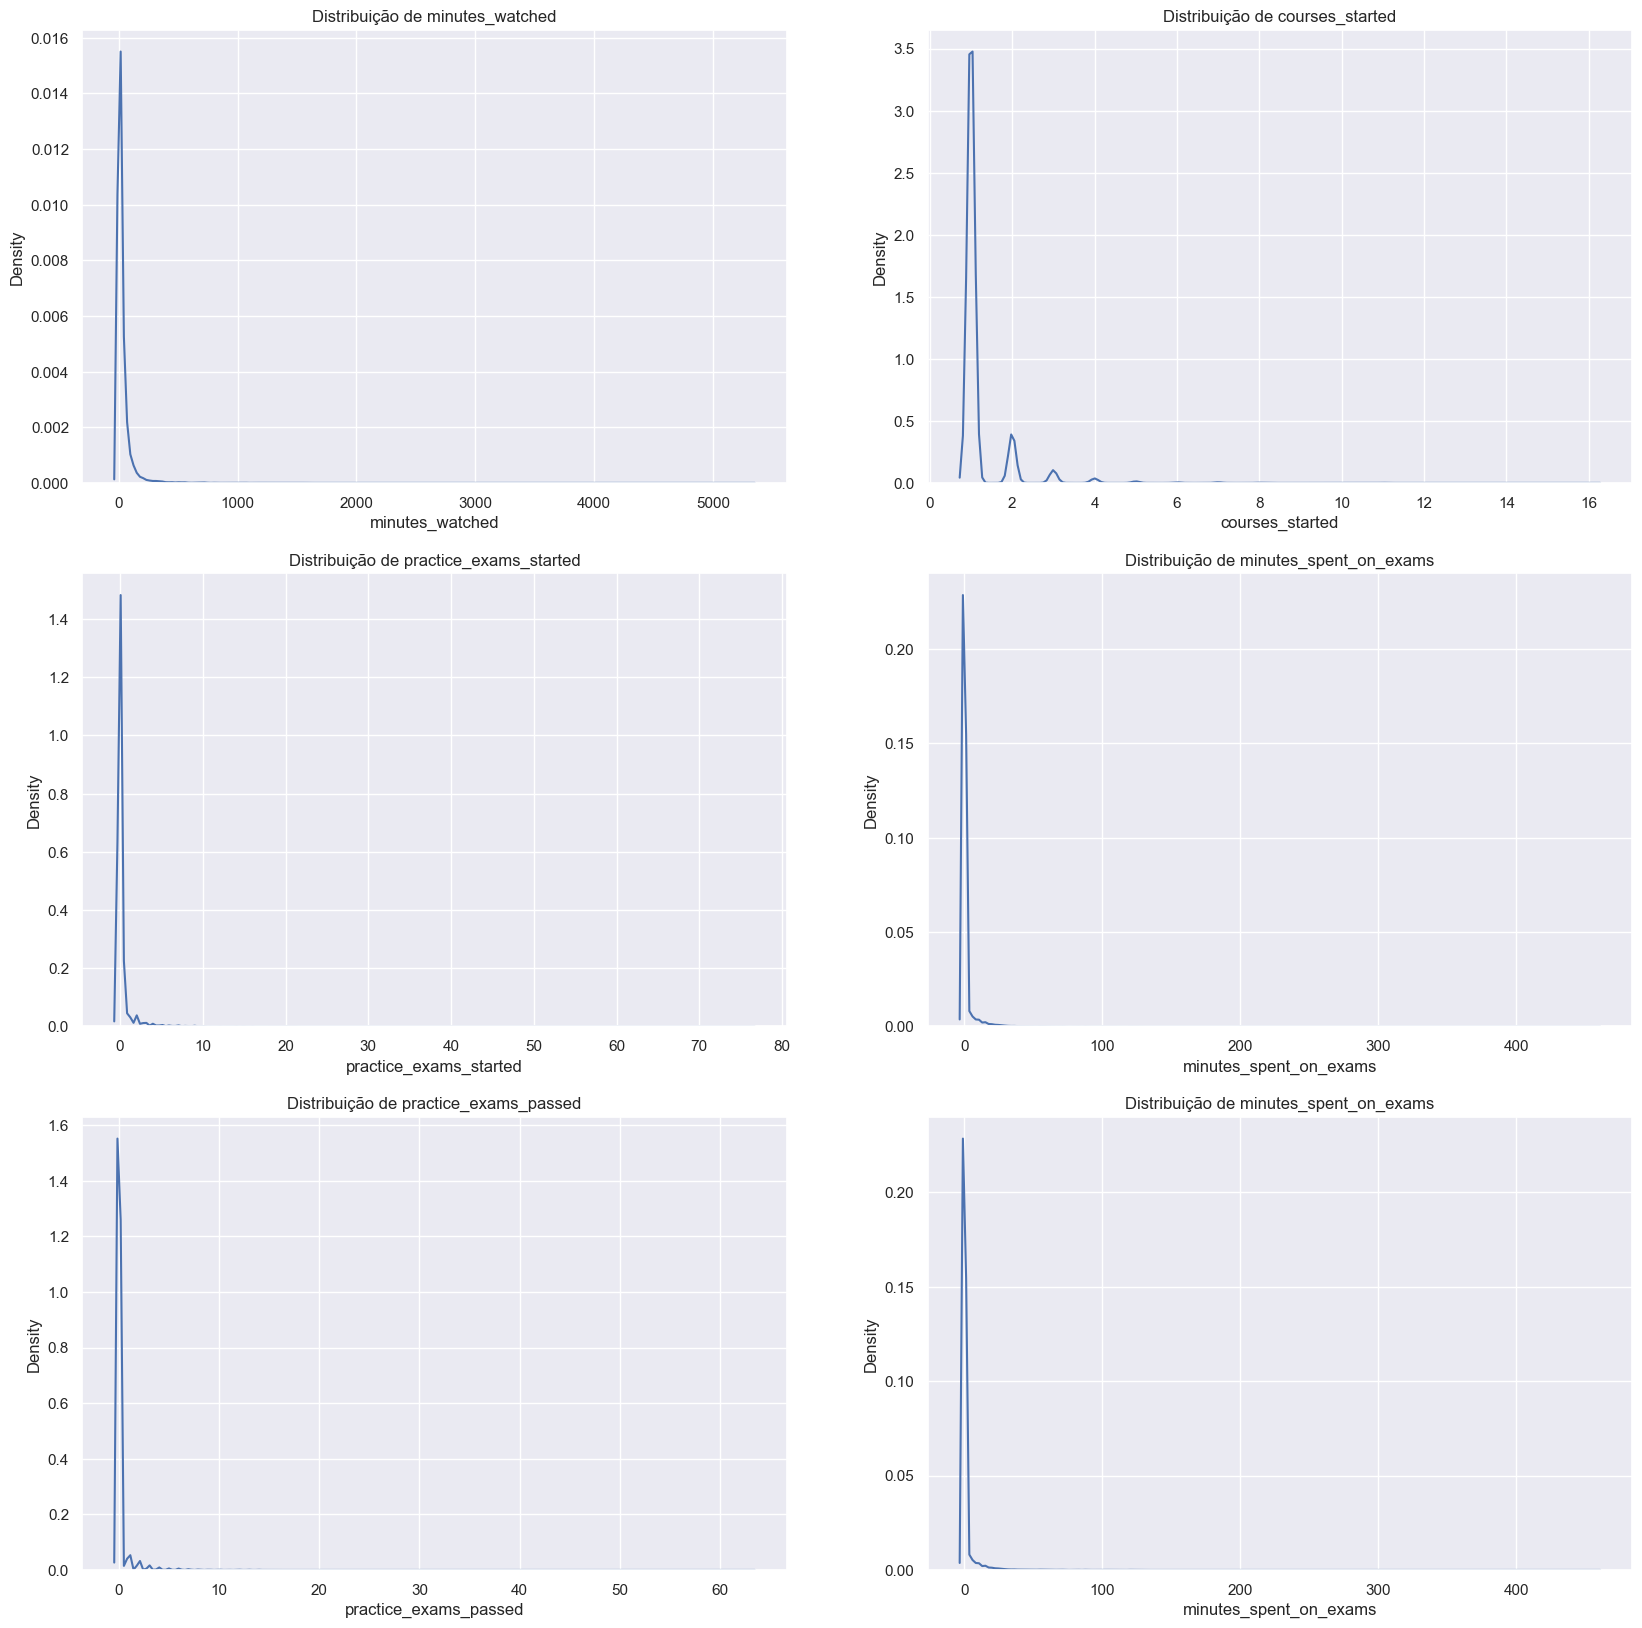

In [7]:
fig, axes = plt.subplots(3, 2, figsize=(20,20))
#transform to a unidimensional list
axes = axes.flatten()

columns = ['days_on_platform', 'courses_started', 'practice_exams_started', 'minutes_spent_on_exams', 'practice_exams_passed',	'minutes_spent_on_exams']

for i, col in enumerate(columns):
    sns.kdeplot(data=data[col], ax=axes[i])
    axes[i].set_title(f'Distribuição de {col}')

plt.show()

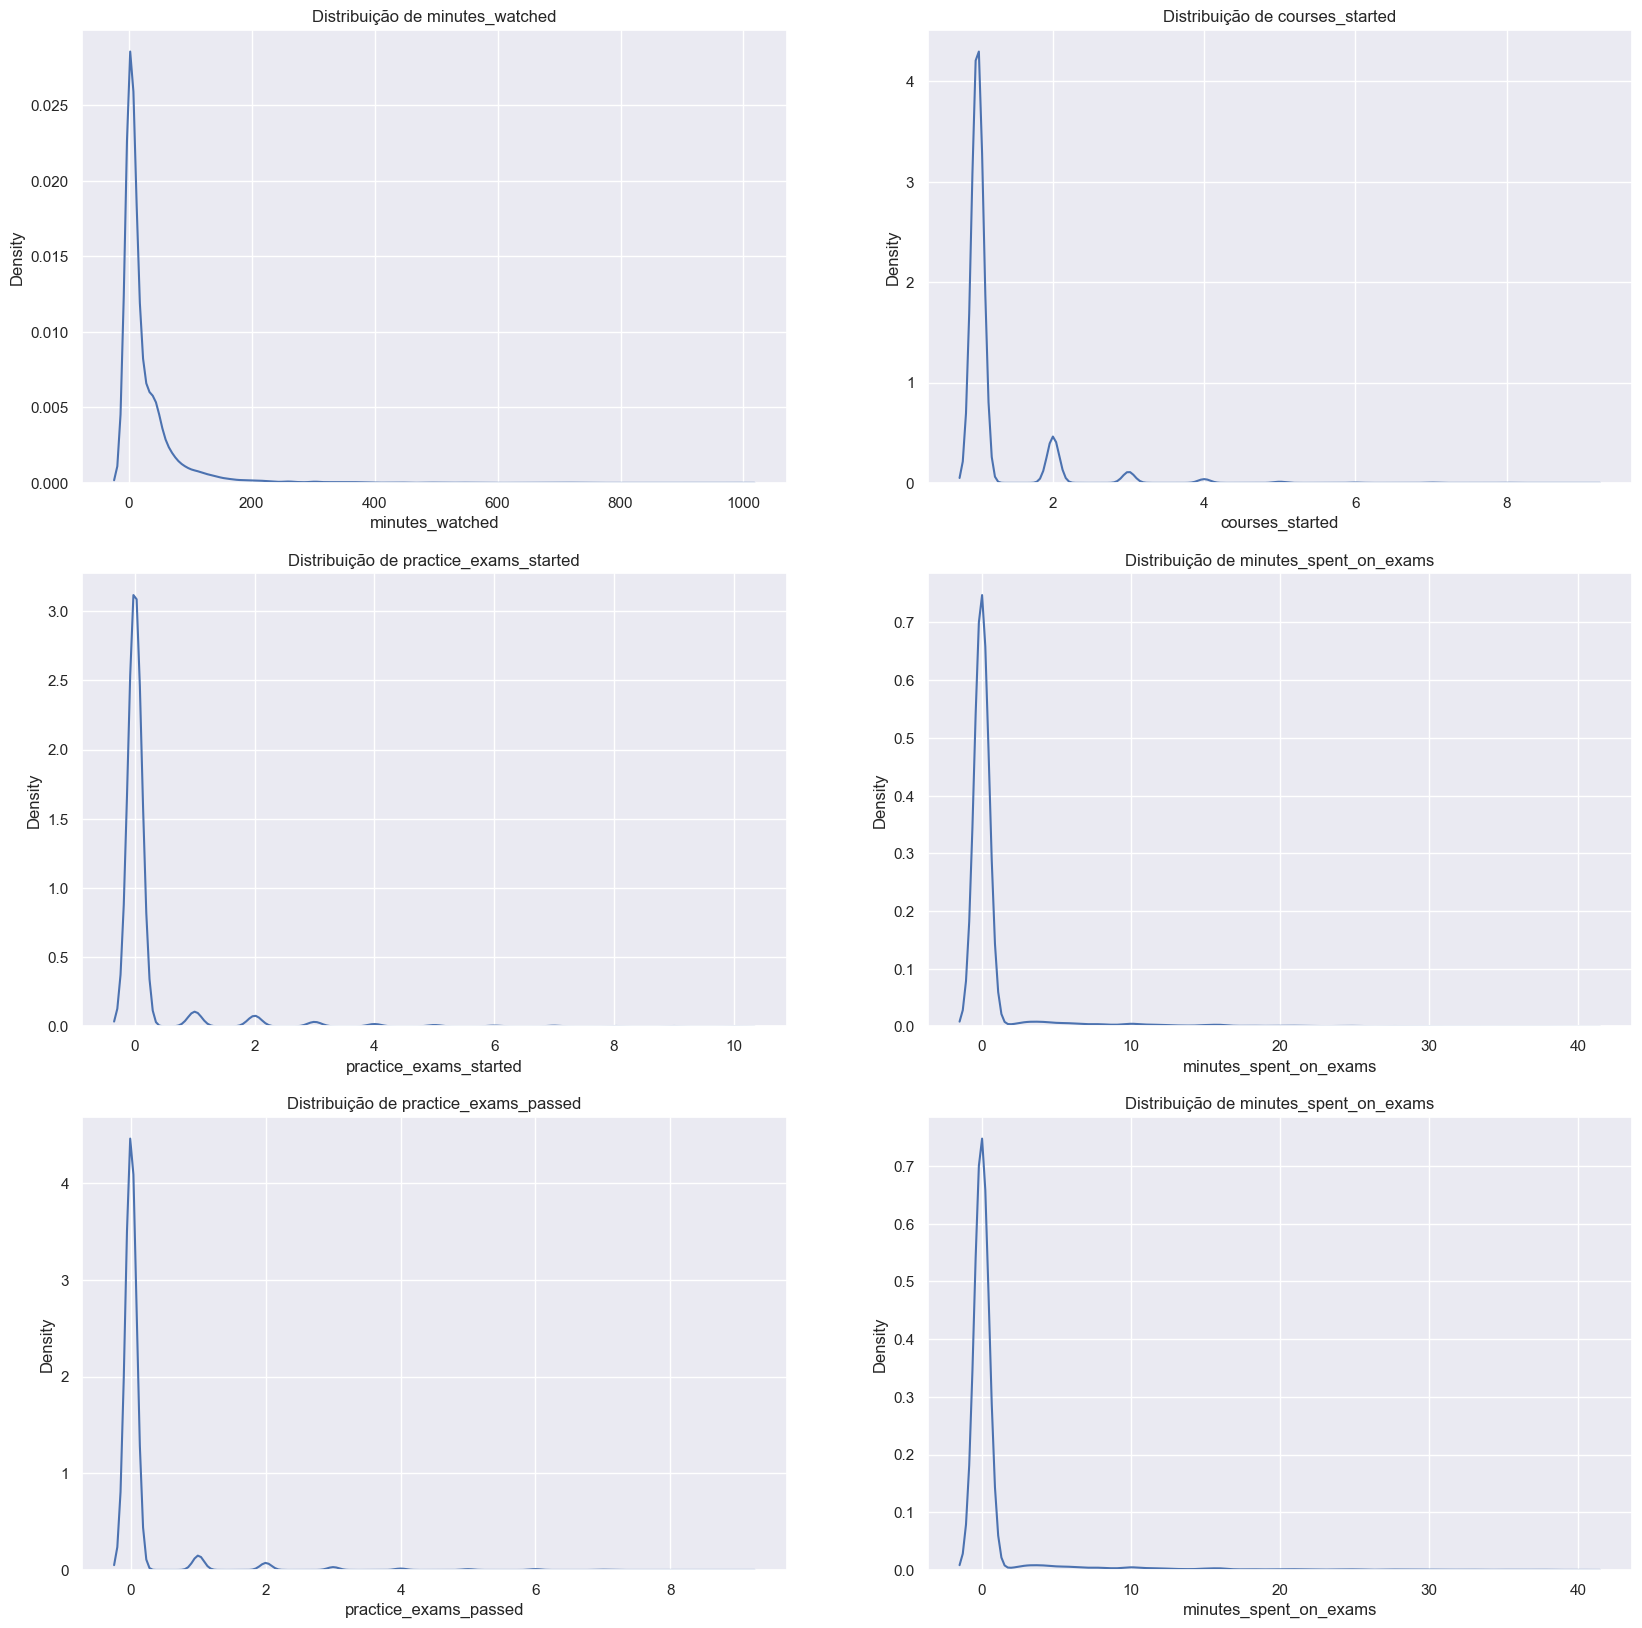

In [8]:
fig, axes = plt.subplots(3, 2, figsize=(20,20))
#transform to a unidimensional list
axes = axes.flatten()

columns = ['minutes_watched', 'courses_started', 'practice_exams_started', 'minutes_spent_on_exams', 'practice_exams_passed',	'minutes_spent_on_exams']

for i, col in enumerate(columns):
    sns.kdeplot(data=data_no_outliers[col], ax=axes[i])
    axes[i].set_title(f'Distribuição de {col}')

plt.show()

### Checking for Multicollinearity

In [9]:
vif_check = data_no_outliers.iloc[:, 1:7]
vif_check.head()

,days_on_platform,minutes_watched,courses_started,practice_exams_started,practice_exams_passed,minutes_spent_on_exams
0,288,358.1,1,2,2,15.81
1,260,1.7,1,1,0,16.00
2,260,22.4,1,1,0,0.93
3,259,18.8,1,1,1,14.63
4,259,118.0,2,2,1,16.48


In [10]:
vif_data = pd.DataFrame()
vif_data["feature"] = vif_check.columns

vif_data["VIF"] = [variance_inflation_factor(vif_check.values, i)
                          for i in range(len(vif_check.columns))]

print(vif_data)

                  feature        VIF
0        days_on_platform   2.301237
1         minutes_watched   1.788777
2         courses_started   3.178713
3  practice_exams_started  10.201823
4   practice_exams_passed   7.812546
5  minutes_spent_on_exams   3.345478


##### We need to drop the larger columns VIF

In [11]:
data_no_outliers['practice_exams_started']

0        2
1        1
2        1
3        1
4        2
        ..
17756    0
17757    0
17758    0
17759    0
17760    0
Name: practice_exams_started, Length: 17626, dtype: int64

In [12]:
data_no_mult = data_no_outliers.copy()
data_no_mult = data_no_mult.drop('practice_exams_started', axis = 1)
data_no_mult.head()

,student_country,days_on_platform,minutes_watched,courses_started,practice_exams_passed,minutes_spent_on_exams,purchased
0,US,288,358.1,1,2,15.81,0
1,SG,260,1.7,1,0,16.00,0
2,TR,260,22.4,1,0,0.93,0
3,KE,259,18.8,1,1,14.63,0
4,IN,259,118.0,2,1,16.48,0


### Dealing with NaN Values

In [13]:
def count_nulls(data):
    columns = data.columns
    for i in columns:
        n = data.loc[data[i].isna()]
        print(f'Number of NANs of {i}: {len(n)}\n')

count_nulls(data_no_mult)

Number of NANs of student_country: 8

Number of NANs of days_on_platform: 0

Number of NANs of minutes_watched: 0

Number of NANs of courses_started: 0

Number of NANs of practice_exams_passed: 0

Number of NANs of minutes_spent_on_exams: 0

Number of NANs of purchased: 0



In [14]:
data_no_nulls = data_no_mult.copy()
data_no_nulls['student_country'] = data_no_nulls['student_country'].fillna('NAM')
data_no_nulls

,student_country,days_on_platform,minutes_watched,courses_started,practice_exams_passed,minutes_spent_on_exams,purchased
0,US,288,358.1,1,2,15.81,0
1,SG,260,1.7,1,0,16.00,0
2,TR,260,22.4,1,0,0.93,0
3,KE,259,18.8,1,1,14.63,0
4,IN,259,118.0,2,1,16.48,0
...,...,...,...,...,...,...,...
17756,EG,0,0.8,1,0,0.00,0
17757,IN,0,0.1,1,0,0.00,0
17758,CM,0,7.8,1,0,0.00,0
17759,CA,0,10.4,1,0,0.00,0


In [15]:
count_nulls(data_no_nulls)

Number of NANs of student_country: 0

Number of NANs of days_on_platform: 0

Number of NANs of minutes_watched: 0

Number of NANs of courses_started: 0

Number of NANs of practice_exams_passed: 0

Number of NANs of minutes_spent_on_exams: 0

Number of NANs of purchased: 0



### Splitting the Data

In [16]:
targets = data_no_nulls['purchased']
inputs = data_no_nulls.drop(['purchased'], axis=1)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size = 0.2, random_state = 365, stratify = targets)

### Encoding the Data

In [18]:
enc = OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value = 170 )

In [19]:
x_train['student_country_enc'] = enc.fit_transform(x_train['student_country'].to_numpy().reshape(-1, 1));
x_test['student_country_enc'] = enc.fit_transform(x_test['student_country'].to_numpy().reshape(-1, 1));

In [20]:
x_train = x_train.drop('student_country', axis = 1)
x_test = x_test.drop('student_country', axis = 1)

In [21]:
x_train_array = np.asarray(x_train, dtype = 'float')
y_train_array = np.asarray(y_train, dtype = 'int')
x_test_array = np.asarray(x_test, dtype = 'float')
y_test_array = np.asarray(y_test, dtype = 'int')

# Creating a Logistic Regression Model

In [22]:
import statsmodels.api as sm

In [80]:
y = y_train_array.copy()
x1 = x_train_array.copy()

In [81]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.150289
         Iterations 10


In [82]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                14100
Model:                          Logit   Df Residuals:                    14093
Method:                           MLE   Df Model:                            6
Date:                Fri, 07 Feb 2025   Pseudo R-squ.:                  0.5111
Time:                        00:14:30   Log-Likelihood:                -2119.1
converged:                       True   LL-Null:                       -4334.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0543      0.118     -8.961      0.000      -1.285      -0.824
x1            -0.0666      0.002    -30.565      0.000      -0.071      -0.062
x2             0.0127      0.001     17.761      0.000       0.011       0.014
x3             0.1971      0.079      2.496      0.013       0.042       0.352
x4             0.1226      0.077      1.600      0.110      -0.028       0.273
x5            -0.0724      0.016     -4.568      0.000      -0.103      -0.041
x6             0.0070      0.001      8.619      0.000       0.005       0.009
==============================================================================

Possibly complete quasi-separation: A fraction 0.43 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [83]:
results_log.pred_table()

array([[12659.,   142.],
       [  520.,   779.]])

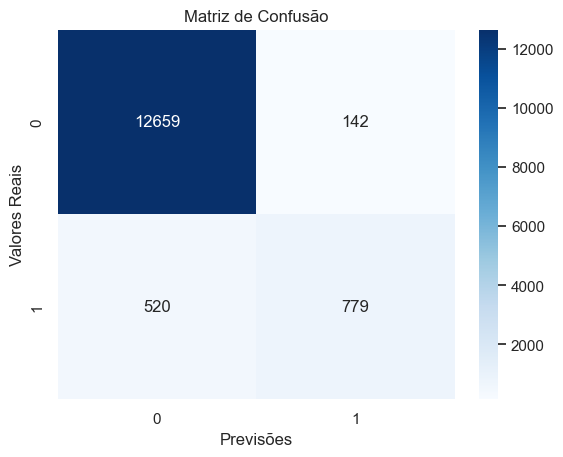

In [84]:
conf_matrix = results_log.pred_table()
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão')
plt.show()

In [85]:
def metrics(conf_matrix):
    TN = conf_matrix[0, 0]  # True Negatives
    FP = conf_matrix[0, 1]  # False Positives
    FN = conf_matrix[1, 0]  # False Negatives
    TP = conf_matrix[1, 1]  # True Positives
    
    # Acurácia
    accuracy = (TP + TN) / conf_matrix.sum()
    
    # Precisão (Precision)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    
    # Recall (Sensibilidade ou Taxa de Verdadeiro Positivo)
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    
    # F1-Score
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1_score:.2f}")

metrics(conf_matrix)

Accuracy: 0.95
Precision: 0.85
Recall: 0.60
F1 Score: 0.70


In [88]:
# Adicionando a constante ao conjunto de teste
x_test_with_const = sm.add_constant(x_test_array)

# Prevendo as probabilidades para os dados de teste
y_pred_probs = results_log.predict(x_test_with_const)

# Convertendo as probabilidades em previsões binárias (0 ou 1)
y_pred = np.where(y_pred_probs > 0.5, 1, 0)

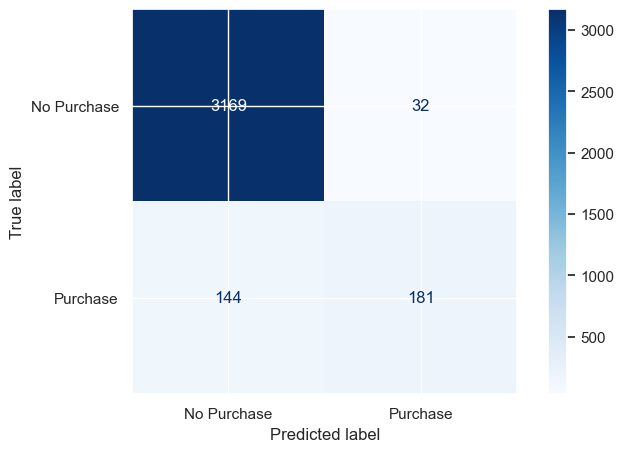

In [89]:
# Criando a matriz de confusão
conf_matrix = confusion_matrix(y_test_array, y_pred)

# Exibindo a matriz de confusão
fig, ax = plt.subplots(figsize=(8, 5))
cmp = ConfusionMatrixDisplay(conf_matrix, display_labels=["No Purchase", "Purchase"])
cmp.plot(ax=ax, cmap='Blues')
plt.show()

In [31]:
metrics(conf_matrix)

Accuracy: 0.95
Precision: 0.83
Recall: 0.56
F1 Score: 0.67


# Creating a K-Nearest Neighbors Model

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import GridSearchCV

In [33]:
error_uniform = []
error_distance = []

k_range = range(1, 51)

for k in k_range:
    
    clf = KNeighborsClassifier(n_neighbors = k, weights = 'uniform')
    clf.fit(x_train, y_train)
    predictions = clf.predict(x_test)
    error_uniform.append(1 - accuracy_score(y_test, predictions))
    
    clf = KNeighborsClassifier(n_neighbors = k, weights = 'distance')
    clf.fit(x_train, y_train)
    predictions = clf.predict(x_test)
    error_distance.append(1 - accuracy_score(y_test, predictions))

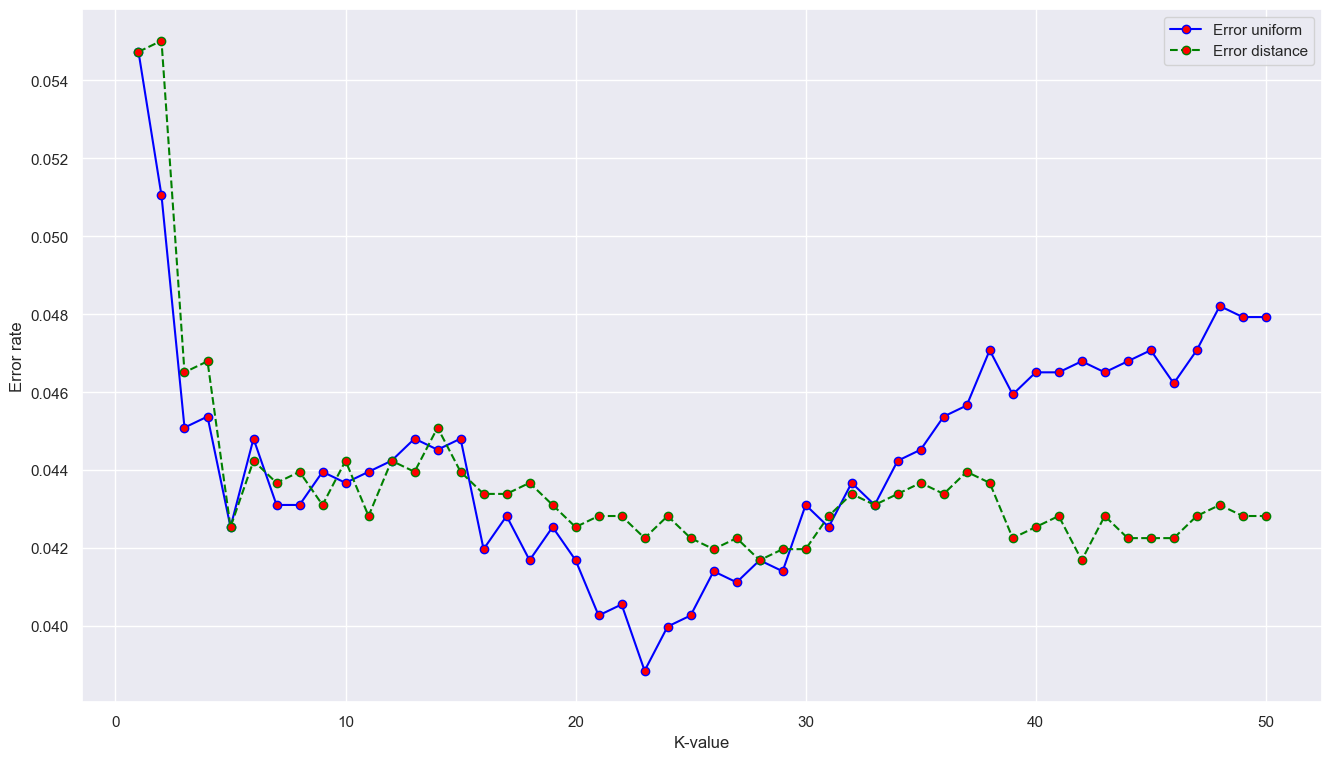

In [34]:
plt.figure(figsize = (16, 9))

plt.plot(k_range, error_uniform, c = 'blue', linestyle = 'solid', 
         marker = 'o', markerfacecolor = 'red',  label = 'Error uniform');
plt.plot(k_range, error_distance, c = 'green', linestyle = 'dashed', 
         marker = 'o', markerfacecolor = 'red', label = 'Error distance');

plt.legend()

plt.xlabel('K-value')
plt.ylabel('Error rate');

In [35]:
parameters = {'n_neighbors':range(1, 51), 
              'weights':['uniform', 'distance']}

In [36]:
grid_search = GridSearchCV(estimator = KNeighborsClassifier(), 
                           param_grid = parameters,
                           scoring = 'accuracy')

In [37]:
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 51),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [38]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=10, weights='distance')

In [39]:
grid_search.best_score_

0.9598581560283688

In [40]:
y_test_pred = clf.predict(x_test)
y_test_pred.shape

(3526,)

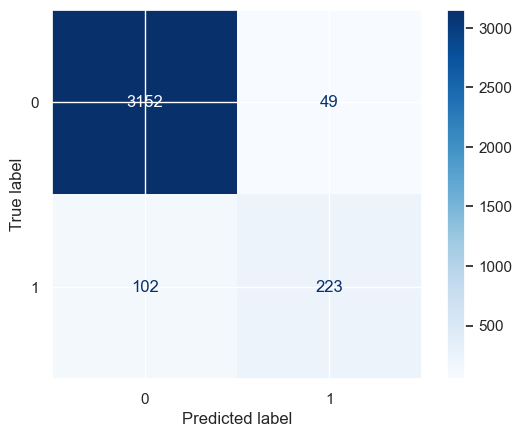

In [41]:
ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred,
    labels = clf.classes_,
    cmap = 'Blues'
);

plt.show()

In [42]:
print(classification_report(y_test, y_test_pred, target_names = ['0', '1']))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3201
           1       0.82      0.69      0.75       325

    accuracy                           0.96      3526
   macro avg       0.89      0.84      0.86      3526
weighted avg       0.95      0.96      0.96      3526



# Creating a Support Vector Machines Model

In [43]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm

In [90]:
scaling = MinMaxScaler(feature_range = (-1,1)).fit(x_train)
x_train_rescaled = scaling.transform(x_train)

In [91]:
tuned_parameters = [
    {'kernel': ['linear'], 'C': [1,10]},
    {'kernel': ['poly'], 'C': [1,10]},
    {'kernel': ['rbf'], 'gamma': ['scale', 'auto'], 'C': [1,10]}
]

In [92]:
scores = ["precision", "recall"]

In [93]:
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(svm.SVC(), tuned_parameters, scoring="%s_macro" % score)
    clf.fit(x_train_rescaled, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_["mean_test_score"]
    stds = clf.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(scaling.transform(x_test))
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 10, 'kernel': 'poly'}

Grid scores on development set:

0.896 (+/-0.032) for {'C': 1, 'kernel': 'linear'}
0.891 (+/-0.038) for {'C': 10, 'kernel': 'linear'}
0.904 (+/-0.023) for {'C': 1, 'kernel': 'poly'}
0.908 (+/-0.023) for {'C': 10, 'kernel': 'poly'}
0.898 (+/-0.030) for {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
0.889 (+/-0.040) for {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
0.904 (+/-0.011) for {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.899 (+/-0.020) for {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3201
           1       0.85      0.66      0.74       325

    accuracy                           0.96      3526
   macro avg       0.91      0.82    

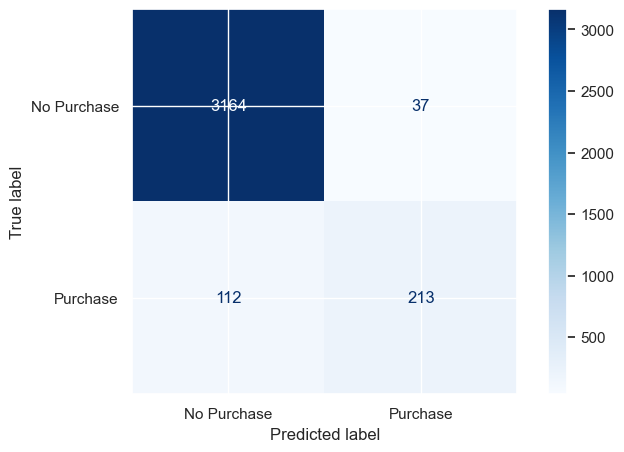

In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(8, 5))

cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_test, y_pred),
    display_labels=["No Purchase", "Purchase"]
)

cmp.plot(ax=ax, cmap = 'Blues');

# Creating a Decision Trees Model

In [50]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [72]:
param_grid = {'ccp_alpha': [0, 0.001, 0.002, 0.003, 0.004, 0.005]}

clf = DecisionTreeClassifier(random_state=365)
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_:.4f}")

Best Parameters: {'ccp_alpha': 0.001}
Best Score: 0.9609


In [73]:
best_alpha = grid_search.best_params_['ccp_alpha']
best_tree = DecisionTreeClassifier(ccp_alpha=best_alpha, random_state=365)
best_tree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.001, random_state=365)

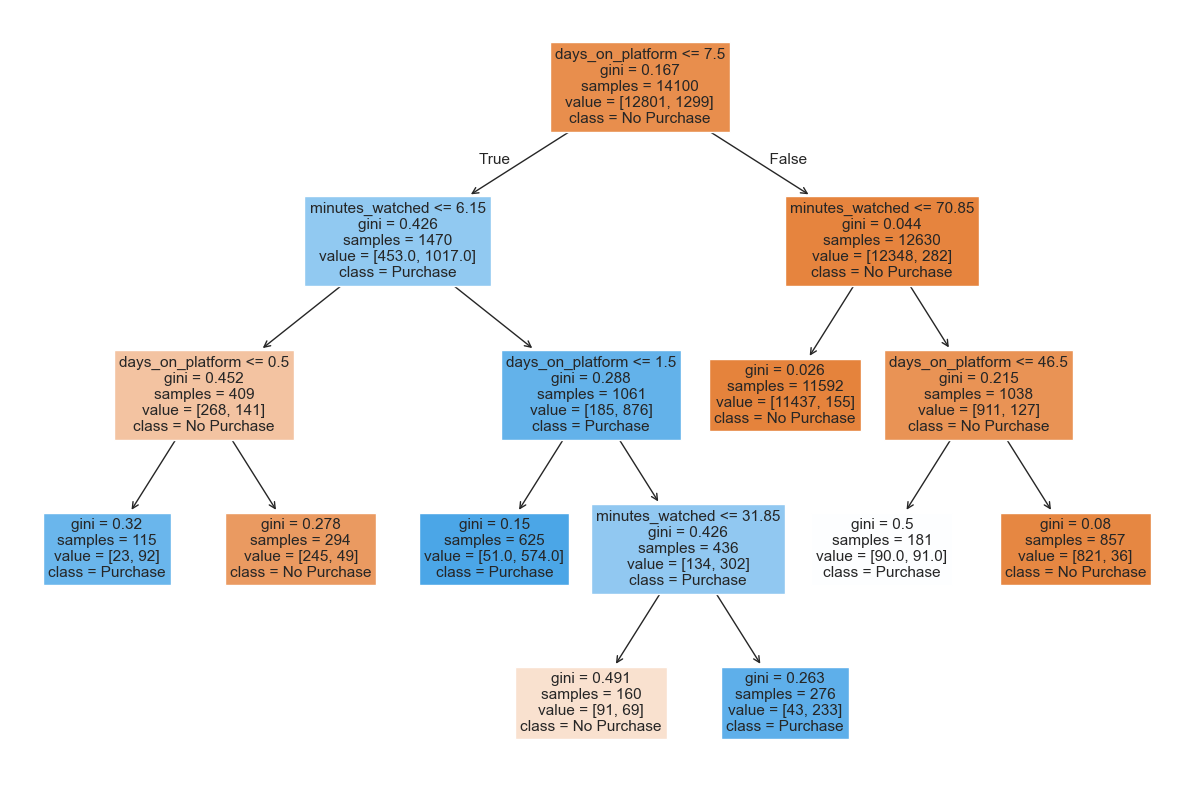

In [74]:
plt.figure(figsize=(15, 10))
plot_tree(
    best_tree, 
    filled=True, 
    feature_names=x_train.columns,  # Change this if your features are stored in a different variable
    class_names=['No Purchase', 'Purchase']
)
plt.show()

In [75]:
test_pred = best_tree.predict(x_test)

In [76]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3201
           1       0.81      0.76      0.78       325

    accuracy                           0.96      3526
   macro avg       0.90      0.87      0.88      3526
weighted avg       0.96      0.96      0.96      3526



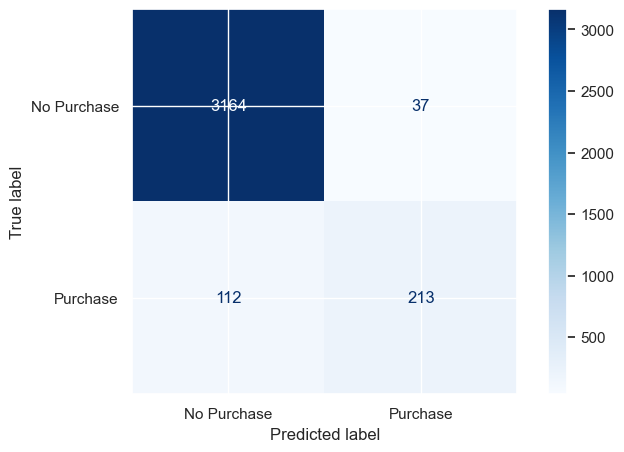

In [77]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(8, 5))

cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_test, y_pred),
    display_labels=["No Purchase", "Purchase"]
)

cmp.plot(ax=ax, cmap = 'Blues');

# Creating a Random Forests Model

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
clf = RandomForestClassifier(ccp_alpha=best_alpha, random_state = 26)

In [56]:
clf.fit(x_train, y_train)

RandomForestClassifier(ccp_alpha=0.001, random_state=26)

In [57]:
test_pred = clf.predict(x_test)

In [58]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3201
           1       0.84      0.74      0.79       325

    accuracy                           0.96      3526
   macro avg       0.91      0.86      0.88      3526
weighted avg       0.96      0.96      0.96      3526



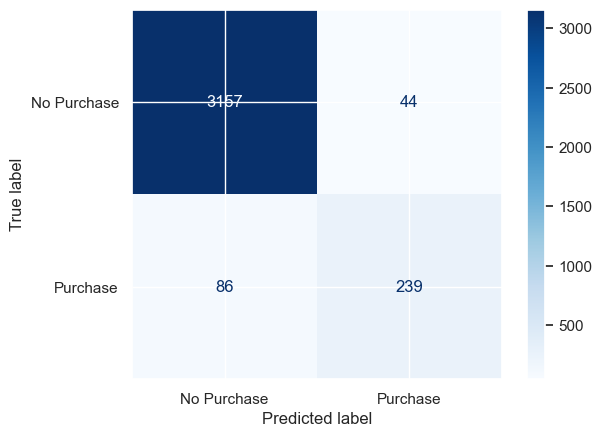

In [59]:
conf_matrix = confusion_matrix(y_test, test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Purchase', 'Purchase'])
disp.plot(cmap='Blues')
plt.show()

# XGBoost

In [60]:
from xgboost import XGBClassifier
model = XGBClassifier(random_state=365)
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=365, ...)

In [61]:
test_pred = model.predict(x_test)
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3201
           1       0.84      0.71      0.77       325

    accuracy                           0.96      3526
   macro avg       0.91      0.85      0.88      3526
weighted avg       0.96      0.96      0.96      3526



In [62]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1]
}

In [63]:
# GridSearchCV
grid_search = GridSearchCV(
    estimator=model, 
    param_grid=param_grid, 
    scoring='accuracy',  # Você pode trocar para 'roc_auc' ou outro critério
    cv=5,                # 5-fold cross-validation
    verbose=1,
    n_jobs=-1
)

# Executando o grid search
grid_search.fit(x_train, y_train)

# Melhor combinação de hiperparâmetros
print("Melhores hiperparâmetros:", grid_search.best_params_)

# Melhor score
print("Melhor accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Melhores hiperparâmetros: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150, 'subsample': 1}
Melhor accuracy: 0.9658865248226951


In [64]:
test_pred = model.predict(x_test)
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3201
           1       0.84      0.71      0.77       325

    accuracy                           0.96      3526
   macro avg       0.91      0.85      0.88      3526
weighted avg       0.96      0.96      0.96      3526



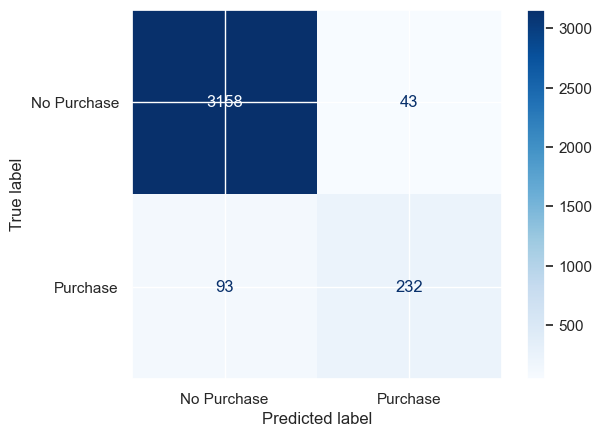

In [65]:
conf_matrix = confusion_matrix(y_test, test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Purchase', 'Purchase'])
disp.plot(cmap='Blues')
plt.show()